In [196]:
import numpy as np
import matplotlib.pyplot as plt
import face_alignment
from skimage import io
from facenet_pytorch import MTCNN
from PIL import Image
import torch
import skimage.io as skio
import torch.nn.functional as F
import cv2
import imutils


In [33]:
mask = skio.imread('data/uv_face_eye_mask.png')

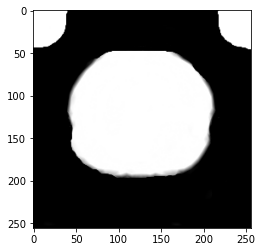

In [34]:
plt.imshow(mask)

In [35]:
mask = torch.from_numpy(mask[:,:,0])[None,None,:,:].contiguous()

In [36]:
mask.shape

torch.Size([1, 1, 256, 256])

In [327]:
mean_texture = skio.imread('data/mean_texture.jpg')

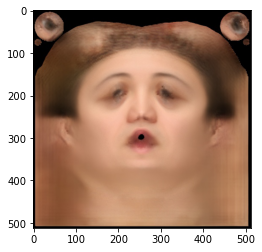

In [328]:
plt.imshow(mean_texture)

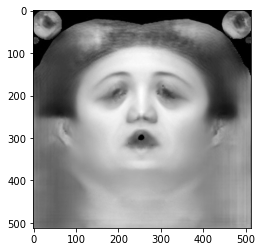

In [329]:
plt.imshow(face_texture,cmap="gray")

In [330]:
face_texture = cv2.cvtColor(mean_texture,cv2.COLOR_BGR2GRAY)

In [331]:
face_texture = face_texture[6:-6,6:-6]

In [332]:
from PIL import Image


In [340]:
face_texture = cv2.resize(face_texture,(512,512))

In [341]:
ret, thresh = cv2.threshold(face_texture,10,255,cv2.THRESH_BINARY)


In [342]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.erode(opening,kernel,iterations=1)
# Finding sure foreground area

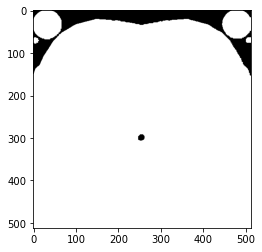

In [343]:
plt.imshow(sure_bg,cmap="gray")

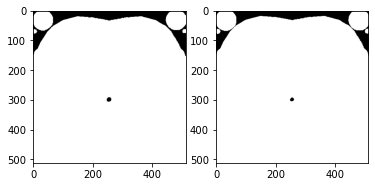

In [346]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(sure_bg,cmap="gray")
axarr[1].imshow(thresh,cmap="gray")

In [347]:
binary_image = sure_bg.copy()

In [348]:
cnts = cv2.findContours(sure_bg.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [349]:
binary_image=  cv2.drawContours(binary_image, cnts, -1, (0,255,0), 3)

In [350]:
M = cv2.moments(cnts[0])
print(M)

{'m00': 207.0, 'm10': 52551.83333333333, 'm01': 61866.33333333333, 'm20': 13345084.0, 'm11': 15705865.75, 'm02': 18493401.166666664, 'm30': 3389772679.8500004, 'm21': 3988277573.116667, 'm12': 4694769283.283333, 'm03': 5529138898.1, 'mu20': 3561.358964039013, 'mu11': -362.454240469262, 'mu02': 3337.398013956845, 'mu30': 12.831788063049316, 'mu21': 665.698014655849, 'mu12': -226.1244969156105, 'mu03': -552.1417875289917, 'nu20': 0.08311416751940565, 'nu11': -0.008458872796780835, 'nu02': 0.0778874189352574, 'nu30': 2.0814276251264476e-05, 'nu21': 0.0010798200772085098, 'nu12': -0.00036679360061541176, 'nu03': -0.0008956220005370298}


In [392]:
face_mask = np.zeros(thresh.shape[:2], dtype="uint8")*255

In [389]:
def is_contour_bad(cnt):
    if(cv2.contourArea(cnt)>10000):
        return True
    

In [390]:
for c in cnts:
    print(cv2.contourArea(c))

207.0
122.5
135.0
236765.0
3605.5
3606.0


In [395]:
# loop over the contours
for c in cnts:
    # if the contour is bad, draw it on the mask
    if is_contour_bad(c):
        cv2.drawContours(face_mask, [c], -1, 255, -1)

In [396]:
ret,mthresh =  cv2.threshold(mask,10,255,cv2.THRESH_BINARY_INV)

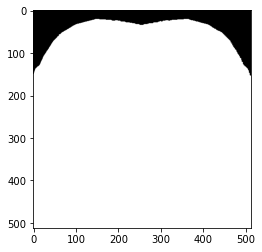

In [397]:
plt.imshow(face_mask,cmap=  "gray")

In [388]:
cv2.imwrite("eye_mask.png",mthresh)

True

In [400]:
mean_texture = mean_texture[6:-6,6:-6]
mean_texture = cv2.resize(mean_texture,(512,512))

In [401]:
masked = cv2.bitwise_and(mean_texture, mean_texture, mask=face_mask)

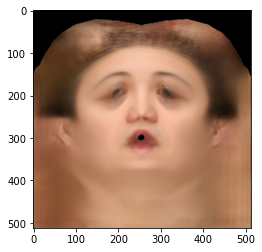

In [402]:
plt.imshow(masked)

In [440]:
tex_half = masked[:,masked.shape[1]//2-1:-1,:]
tex_half.shape

(512, 256, 3)

In [441]:
cv2.flip(tex_half,1).shape

(512, 256, 3)

In [442]:
masked[:,:masked.shape[1]//2-1,:].shape

(512, 255, 3)

In [443]:
masked[:,:masked.shape[1]//2] = cv2.flip(tex_half,1) 

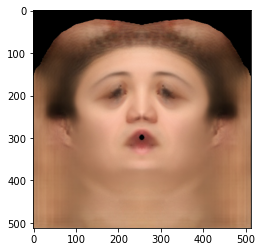

In [444]:
plt.imshow(masked )

In [413]:
masked.shape[1]//2

256

In [446]:
cv2.imwrite("mean_texture_symmetric.png",cv2.cvtColor(masked, cv2.COLOR_RGB2BGR))

True

In [454]:
mean_texture_symmetric=cv2.imread(".\data\mean_texture_symmetric.png")
mean_texture_symmetric = cv2.cvtColor(mean_texture_symmetric,cv2.COLOR_BGR2RGB)

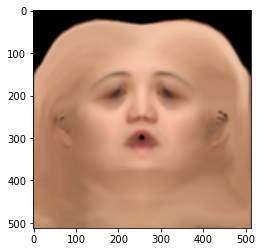

In [462]:
plt.imshow(mean_blur)

In [461]:
mean_blur = cv2.blur(mean_texture_symmetric,(7,7))

In [40]:
mean_texture.shape

(512, 512, 3)

In [46]:
 mean_texture = torch.from_numpy(mean_texture.transpose(2,0,1))[None,:,:,:].contiguous()

In [58]:
mean_texture = F.interpolate(mean_texture, [2048,2048])

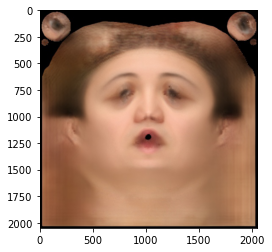

In [59]:
plt.imshow(np.array(mean_texture)[0].transpose(1,2,0))

In [71]:
skio.imsave('mean_texture_HR.png',np.array(mean_texture)[0].transpose(1,2,0))

In [73]:
checkpoint = torch.load("data/deca_model.tar")

In [78]:
checkpoint.keys()

dict_keys(['E_flame', 'E_detail', 'D_detail', 'opt', 'epoch', 'iter', 'all_iter', 'batch_size'])

In [89]:
parameters = np.load("Results/4/4parameters.npy",allow_pickle=True).tolist()

In [92]:
parameters.keys()

dict_keys(['shape', 'tex', 'exp', 'pose', 'cam', 'light', 'detail', 'images'])

In [102]:
parameters['shape'].shape

torch.Size([1, 100])

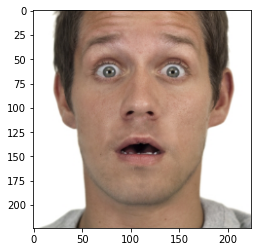

In [99]:
plt.imshow(np.array(parameters['images'])[0].transpose(1,2,0))